# Import

Import des données sans les tags.

Pour le calcul sur l'ensemble des données, on n'effectue que le TF-IDF qui donne des résultats similaires au CountVectorizer.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dataTF = pd.read_csv('TF-IDF_CUT.csv')
data = pd.read_csv('dataRaw_CUT.csv')

Aperçu :

In [2]:
data.head(5)

,Tags,TitleBody
0,['c#'],double c convert work follow build form contro...
1,"['.net', 'c#']",base age type calculate birthday birthday pers...
2,['c#'],time relative calculate display value time day...
3,['.net'],difference net difference
4,['c#'],set result query set business type populate wa...


In [3]:
dataTF.head(5)

,ability,abort,absolute,abstract,abstraction,accept,access,accomplish,accord,account,accurate,achieve,act,action,activex,activity,ad,adapter,add,addition,address,adjust,administrator,admit,adobe,advance,advantage,advice,affect,age,ago,agree,air,alert,algorithm,allocate,allocation,allow,alpha,alter,alternative,analysis,anchor,android,animate,animation,annotation,annoy,answer,ant,anybody,anyways,apache,api,appear,append,apple,applet,application,apply,appreciate,approach,appropriate,arbitrary,architecture,area,argument,array,arrow,article,ascii,ask,asp,aspect,assembly,assert,assertion,assign,assignment,associate,assume,assumption,attach,attempt,attribute,audio,authenticate,authentication,author,auto,automate,automation,avail,avoid,aware,background,backup,backwards,bar,base,bash,basic,basis,batch,bean,bear,begin,beginner,beginning,behave,behavior,behaviour,believe,benefit,best,beta,better,bin,binary,bind,binding,bit,bite,bitwise,blah,blank,bloat,block,board,body,bonus,book,bool,boolean,boost,bother,bound,box,brace,brain,branch,break,bring,browse,browser,buffer,bug,build,builder,building,bunch,bundle,business,button,buy,bytecode,cache,calculate,calculation,calendar,callback,caller,camera,cancel,candidate,canvas,capability,capacity,capture,car,card,care,caret,case,cast,castle,cat,catch,category,caught,cause,caveat,cell,center,certificate,chain,chance,change,channel,char,character,chart,check,child,choice,choose,chrome,chunk,clarification,clarify,clarity,class,classpath,clause,clean,cleaner,cleanup,clearer,clever,click,client,clone,close,closing,closure,clr,clue,cluster,cocoa,cod,code,coding,colleague,collect,collection,collector,college,color,column,combination,combine,come,comma,command,comment,common,communicate,communication,community,compact,company,compare,comparison,compatibility,compilation,compile,compiler,complete,completion,complex,complexity,compliant,complicate,component,comprehension,compress,compression,concatenate,concatenation,concept,concern,concise,conclusion,concrete,concurrency,concurrent,condition,configuration,configure,confirm,conflict,confuse,confusion,conn,connect,connection,consensus,consider,consistent,console,constant,constraint,construct,constructor,consume,consumer,consumption,contact,contain,container,content,context,continue,contract,control,controller,convenient,convention,conversion,convert,convince,cool,copy,copyright,core,corner,correct,correspond,cost,count,counter,couple,course,cover,coverage,crash,create,creation,credit,criterion,cross,cs,css,culture,curiosity,curious,cursor,custom,customer,cut,cycle,data,database,date,day,deadlock,deal,debate,debug,debugger,debugging,decent,decide,decimal,decision,declaration,declare,decode,decorate,decorator,default,define,definition,delay,delegate,delete,deletion,demand,demonstrate,depend,dependency,dependent,deploy,deployment,deprecate,depth,derive,description,design,designer,desire,despite,destination,destroy,destructor,detect,detection,determine,dev,develop,developer,development,device,dictionary,diff,differ,difference,dig,dim,direct,direction,directory,dirty,disable,disconnect,discover,discussion,disk,display,dispose,distance,distribute,distribution,div,django,doc,document,documentation,dom,domain,double,doubt,dozen,drag,draw,drive,driver,drop,dump,duplicate,duplication,duration,dynamic,ease,easy,eclipse,edge,edit,edition,editor,ee,effect,efficiency,efficient,effort,elegant,element,eliminate,embed,employee,enable,encode,encrypt,encryption,end,enforce,engine,engineering,enjoy,ensure,enter,enterprise,entity,entry,enumerate,enumeration,environment,equality,equivalent,error,escape,establish,eval,evaluate,event,everybody,evil,ex,exact,examine,example,excel,exception,exchange,exclude,execute,execution,exercise,exist,existence,exists,exit,expand,expect,experience,experiment,explain,explanation,explicit,explore,explorer,export,expose,express,expression,extend,extension,extern,external,extra,extract,face,facility,fact,factor,factory,fail,failure,fall,false,fancy,

### Nuage de mots

Affichage des mots sous forme de nuage, fonction

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def afficheNuage(listeMots):
    
    # Jointure des mots sous forme d'objet wordcloud
    long_string = ' '.join(list(listeMots))
    
    # Création du nuage
    wordcloud = WordCloud(background_color="white")
    
    # Affichage
    fig = plt.figure(figsize=(10, 6))
    wordcloud.generate(long_string)
    plt.imshow(wordcloud.to_image())
    plt.axis("off")
    plt.show()

Application de la fonction :

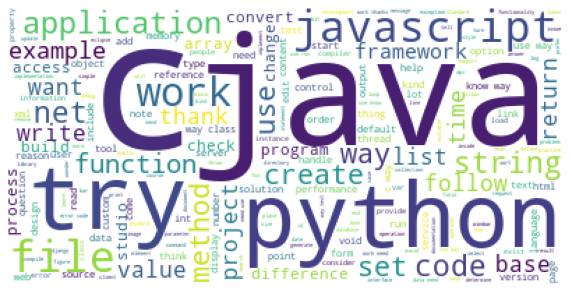

In [5]:
afficheNuage(data['TitleBody'].values)

# Non supervisé

### Bag of words

On recrée le dictionnaire qui correspond au corpus des mots uniques et on applique un :

In [6]:
from gensim.utils import simple_preprocess
from gensim import corpora

lignes = []
for i, x in data.iterrows():
    lignes.append(x['TitleBody'])

doc_tokenized = [simple_preprocess(doc, min_len=1) for doc in lignes]
dictionary = corpora.Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
# print(BoW_corpus)

Affichage de la première ligne du corpus :

In [7]:
import nltk

print(nltk.word_tokenize(data['TitleBody'][0]))
print(len(nltk.word_tokenize(data['TitleBody'][0])))

['double', 'c', 'convert', 'work', 'follow', 'build', 'form', 'control', 'use', 'opacity', 'project', 'past', 'want', 'application', 'decimal', 'convert', 'change', 'error', 'code', 'try']
20


### LDA

Nombre de cluster que l'on souhaite effectuer.

In [8]:
N_TAGS = 6
N_CLUSTERS = 6
N_MOTS = 100

Création de la LDA :

In [9]:
import gensim

lda = gensim.models.LdaMulticore(BoW_corpus, num_topics=N_CLUSTERS, id2word=dictionary, passes=2, workers=2)

Affichage des sujets créés sous forme de nuages. Comme on a un poids associé à chaque mot pour chaque sujet, on duplique les mots autant de fois qu'il y a des poids (multipliés par mille de manière à obtenir un entier) afin de tracer le nuage de mots pondéré :

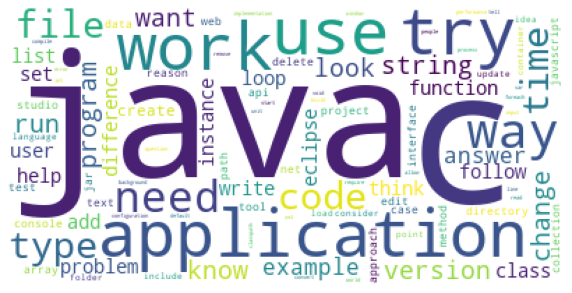

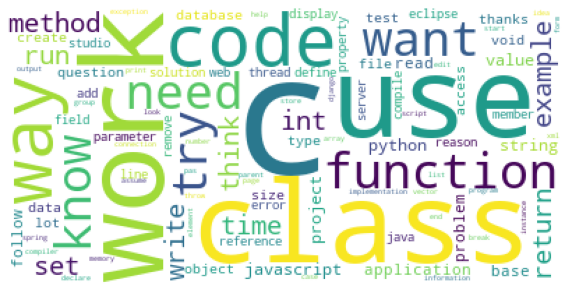

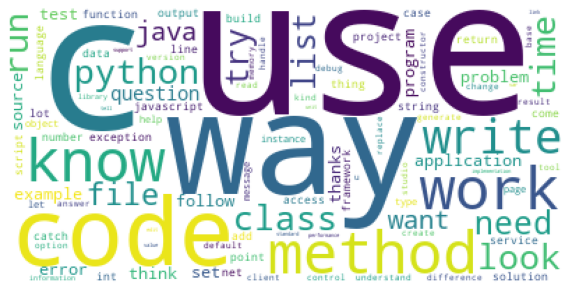

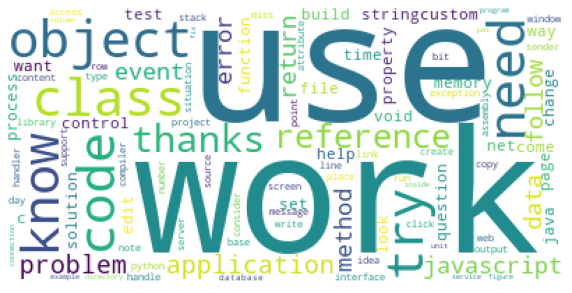

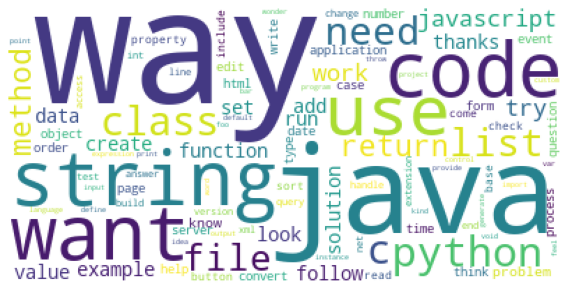

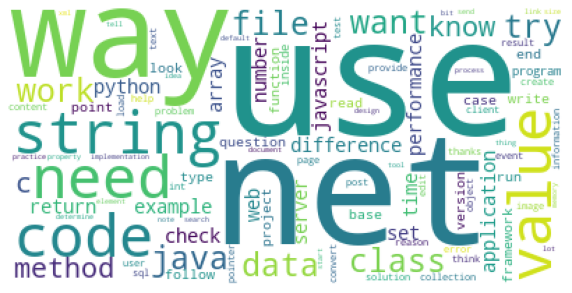

In [10]:
import re
import numpy as np

# On effectue une boucle sur chaque topic
for id, topic in lda.show_topics(formatted=True, num_topics=N_CLUSTERS, num_words=N_MOTS):
    
    # On souhaite extraire un vecteur de mots pondéré (répétés)
    motsTopics = []
    
    # On sépare les mots par des +
    motsPoids = topic.split('+')
    
    # Pour chaque paire mot/poids extrait ces valeurs
    for motpoids in motsPoids:
        
        # La répétition du mot
        poids = re.findall("\d+\.\d+", motpoids)
        poids = float(poids[0])
        poids = poids*1000
        
        # Le mot
        mot = re.findall("[a-z]+", motpoids)
        mot = mot[0]
        # print(mot)
        
        # On ajoute n fois le mot au corpus du sujet
        for i in np.arange(1, poids):
            motsTopics.append(mot)
    
    # On affiche finalement le nuage
    afficheNuage(motsPoids)

Cohérence :

In [11]:
"""from gensim import corpora, models
from gensim.models import CoherenceModel
from pprint import pprintcoh = CoherenceModel(model=lda, texts=proc_docs, dictionary = dictionary, coherence = "c_v")
coh_lda = coh.get_coherence()
print("Coherence Score:", coh_lda)"""

'from gensim import corpora, models\nfrom gensim.models import CoherenceModel\nfrom pprint import pprintcoh = CoherenceModel(model=lda, texts=proc_docs, dictionary = dictionary, coherence = "c_v")\ncoh_lda = coh.get_coherence()\nprint("Coherence Score:", coh_lda)'

Visualisation :

In [12]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings("ignore")

pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda, BoW_corpus, dictionary)
pyLDAvis.display(lda_viz)

### Kmeans

Fonctions :

In [13]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

try:
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

mpl.rcParams["figure.figsize"] = (9, 6)


def displayElbowKMEANS(data, kmin, kmax):
    X = data.values
    # Instantiate the clustering model and visualizer
    model = KMeans(random_state=0)
    visualizer = KElbowVisualizer(model, k=(kmin, kmax), timings=False)
    visualizer.fit(X)    # Fit the data to the visualizer
    visualizer.poof()    # Draw/show/poof the data


def calculKMEANS(data, kopti):
    # Calcul opti
    X = data.values
    model = KMeans(kopti, random_state=0)

    # Affichage
    fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
    visualizer = SilhouetteVisualizer(model, ax=axes[0])
    visualizer.fit(X)    # Fit the data to the visualizer
    visualizer = InterclusterDistance(model, ax=axes[1])
    visualizer.fit(X)    # Fit the data to the visualizer
    visualizer.poof()    # Draw/show/poof the data

    # Affichage des moyennes par cluster
    etiquettes = model.labels_
    # return etiquettes

Standardisation des données :

In [14]:
from sklearn.preprocessing import StandardScaler

dataTFSTD = pd.DataFrame(StandardScaler().fit_transform(dataTF))

Calcul pour le nombre de clusters :

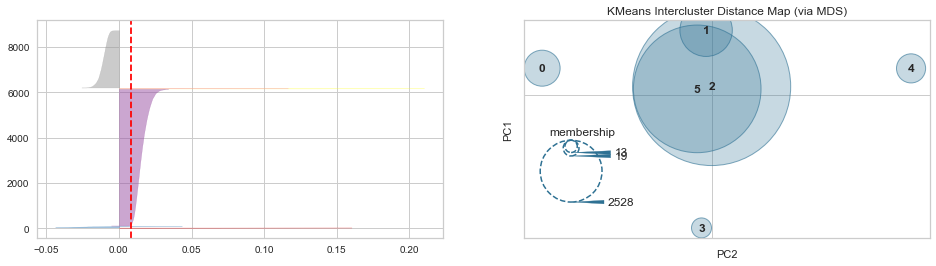

In [15]:
calculKMEANS(dataTFSTD, N_CLUSTERS)

# Supervisé

### Import avec tags

In [16]:
dataTFTags = pd.read_csv('TF-IDFTags_CUT.csv')
print(dataTFTags.shape[1])
print(dataTFTags.shape[1]-N_TAGS)

1506
1500


In [17]:
dataTFTags.head(5)

,ability,abort,absolute,abstract,abstraction,accept,access,accomplish,accord,account,accurate,achieve,act,action,activex,activity,ad,adapter,add,addition,address,adjust,administrator,admit,adobe,advance,advantage,advice,affect,age,ago,agree,air,alert,algorithm,allocate,allocation,allow,alpha,alter,alternative,analysis,anchor,android,animate,animation,annotation,annoy,answer,ant,anybody,anyways,apache,api,appear,append,apple,applet,application,apply,appreciate,approach,appropriate,arbitrary,architecture,area,argument,array,arrow,article,ascii,ask,asp,aspect,assembly,assert,assertion,assign,assignment,associate,assume,assumption,attach,attempt,attribute,audio,authenticate,authentication,author,auto,automate,automation,avail,avoid,aware,background,backup,backwards,bar,base,bash,basic,basis,batch,bean,bear,begin,beginner,beginning,behave,behavior,behaviour,believe,benefit,best,beta,better,bin,binary,bind,binding,bit,bite,bitwise,blah,blank,bloat,block,board,body,bonus,book,bool,boolean,boost,bother,bound,box,brace,brain,branch,break,bring,browse,browser,buffer,bug,build,builder,building,bunch,bundle,business,button,buy,bytecode,cache,calculate,calculation,calendar,callback,caller,camera,cancel,candidate,canvas,capability,capacity,capture,car,card,care,caret,case,cast,castle,cat,catch,category,caught,cause,caveat,cell,center,certificate,chain,chance,change,channel,char,character,chart,check,child,choice,choose,chrome,chunk,clarification,clarify,clarity,class,classpath,clause,clean,cleaner,cleanup,clearer,clever,click,client,clone,close,closing,closure,clr,clue,cluster,cocoa,cod,code,coding,colleague,collect,collection,collector,college,color,column,combination,combine,come,comma,command,comment,common,communicate,communication,community,compact,company,compare,comparison,compatibility,compilation,compile,compiler,complete,completion,complex,complexity,compliant,complicate,component,comprehension,compress,compression,concatenate,concatenation,concept,concern,concise,conclusion,concrete,concurrency,concurrent,condition,configuration,configure,confirm,conflict,confuse,confusion,conn,connect,connection,consensus,consider,consistent,console,constant,constraint,construct,constructor,consume,consumer,consumption,contact,contain,container,content,context,continue,contract,control,controller,convenient,convention,conversion,convert,convince,cool,copy,copyright,core,corner,correct,correspond,cost,count,counter,couple,course,cover,coverage,crash,create,creation,credit,criterion,cross,cs,css,culture,curiosity,curious,cursor,custom,customer,cut,cycle,data,database,date,day,deadlock,deal,debate,debug,debugger,debugging,decent,decide,decimal,decision,declaration,declare,decode,decorate,decorator,default,define,definition,delay,delegate,delete,deletion,demand,demonstrate,depend,dependency,dependent,deploy,deployment,deprecate,depth,derive,description,design,designer,desire,despite,destination,destroy,destructor,detect,detection,determine,dev,develop,developer,development,device,dictionary,diff,differ,difference,dig,dim,direct,direction,directory,dirty,disable,disconnect,discover,discussion,disk,display,dispose,distance,distribute,distribution,div,django,doc,document,documentation,dom,domain,double,doubt,dozen,drag,draw,drive,driver,drop,dump,duplicate,duplication,duration,dynamic,ease,easy,eclipse,edge,edit,edition,editor,ee,effect,efficiency,efficient,effort,elegant,element,eliminate,embed,employee,enable,encode,encrypt,encryption,end,enforce,engine,engineering,enjoy,ensure,enter,enterprise,entity,entry,enumerate,enumeration,environment,equality,equivalent,error,escape,establish,eval,evaluate,event,everybody,evil,ex,exact,examine,example,excel,exception,exchange,exclude,execute,execution,exercise,exist,existence,exists,exit,expand,expect,experience,experiment,explain,explanation,explicit,explore,explorer,export,expose,express,expression,extend,extension,extern,external,extra,extract,face,facility,fact,factor,factory,fail,failure,fall,false,fancy,

### Folds validation croisée

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

nbOfSlices = 10
kf = KFold(n_splits=nbOfSlices, shuffle=False)
cv = RepeatedKFold(n_splits=nbOfSlices)

### Split du jeu de données

Fonction qui récupère automatiquement les bonnes colonnes dans les dataframes :

In [19]:
from sklearn.model_selection import train_test_split


def splitXYtags(dataWithTags, dataWithoutTags, N_TAGS):
    
    X = dataWithTags.iloc[:, :dataWithoutTags.shape[1]]
    Y = dataWithTags.iloc[:, -N_TAGS:]
    
    return train_test_split(X, Y, train_size=0.8, random_state=0)

### Random Forest

Fonction qui reprend le split (adapté à la manière dont sont découpées nos données) et le random forest :

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import pickle


# Calcul de R2 sur la random forest
def randomForestMultiple(dataWithTags, dataWithoutTags, N_TAGS):
    
    # Split des données
    X_train, X_test, Y_train, Y_test = splitXYtags(dataWithTags, dataWithoutTags, N_TAGS)
    
    # Hyperparamètres
    parameters = {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 25, 50]
    }

    # Création du modèle
    rf = RandomForestClassifier(random_state=0)
    grid_clf1 = GridSearchCV(rf, param_grid=parameters, cv=kf)
    multi_target_linear1 = MultiOutputClassifier(grid_clf1)
    multi_target_linear1.fit(X_train, Y_train)
    
    # Sauvegarde
    pickle.dump(grid_clf1, open('CV_RF.pkl', 'wb'))
    pickle.dump(multi_target_linear1, open('CV_RF_MULTI.pkl', 'wb'))

    # Scores
    print(jaccard_score(Y_test, multi_target_linear1.predict(X_test), average='macro'))
    print(jaccard_score(Y_test, multi_target_linear1.predict(X_test), average='micro'))
    print(f1_score(Y_test, multi_target_linear1.predict(X_test), average='macro'))
    print(f1_score(Y_test, multi_target_linear1.predict(X_test), average='micro'))
    print()

Application de la random forest :

In [21]:
randomForestMultiple(dataTFTags, dataTF, N_TAGS)

0.49744055676334115
0.4318936877076412
0.6249329936890143
0.6032482598607889



### Gradient Boosting

Même fonction pour le GB :

In [22]:
from sklearn.ensemble import GradientBoostingClassifier


# Calcul de R2 sur la random forest
def gradientboostingMultiple(dataWithTags, dataWithoutTags, N_TAGS):
    
    # Split des données
    X_train, X_test, Y_train, Y_test = splitXYtags(dataWithTags, dataWithoutTags, N_TAGS)
    
    # Hyperparamètres
    parameters = {
        "n_estimators": [50, 100, 150],
        "max_depth": [1, 3, 5],
    }
    
    # Création du modèle
    gb = GradientBoostingClassifier(random_state=0)
    grid_clf2 = GridSearchCV(gb, param_grid=parameters, cv=kf)
    multi_target_linear2 = MultiOutputClassifier(grid_clf2)
    multi_target_linear2.fit(X_train, Y_train)
    
    # Sauvegarde
    pickle.dump(grid_clf2, open('CV_GB.pkl', 'wb'))
    pickle.dump(multi_target_linear2, open('CV_GB_MULTI.pkl', 'wb'))
    
    # Scores
    print(jaccard_score(Y_test, multi_target_linear2.predict(X_test), average='macro'))
    print(jaccard_score(Y_test, multi_target_linear2.predict(X_test), average='micro'))
    print(f1_score(Y_test, multi_target_linear2.predict(X_test), average='macro'))
    print(f1_score(Y_test, multi_target_linear2.predict(X_test), average='micro'))
    print()

Application du GB :

In [23]:
gradientboostingMultiple(dataTFTags, dataTF, N_TAGS)

0.5170816049896986
0.4617878647522001
0.6521525618364709
0.6318124207858047

